In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('train.csv')
data.head()

C:\Users\aleh\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (0,2,3,10,11,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,text,in_reply_to_user_id,user.id,user.name,user.screen_name,user.description,user.location,user.lang,user.time_zone,user.utc_offset,user.statuses_count,user.followers_count,user.friends_count,user.favourites_count,user.created_at,user.geo_enabled,user.is_translation_enabled,user.listed_count,retweet_count
0,629692043326062592,Me and ma fwends 🍎 http://t.co/B3YJ31hZuc,0,133840449,Paul C. wilson,xcaptainpaulx,Guitarist for @chunknocaptainc // Founder @off...,NaN,fr,Paris,7200,1606,9164.0,205.0,758,Fri Apr 16 19:33:58 +0000 2010,True,False,27.0,12.0
1,629692041362968576,@SinedioMD @AspyrMedia Try this link https://t...,7.62923e+06,21245956,Direct2Drive.com,Direct2Drive,D2D has an ever-expanding library of downloada...,"California, USA",en,Pacific Time (US & Canada),-25200,3004,7484.0,708.0,44,Wed Feb 18 21:58:04 +0000 2009,False,False,330.0,0.0
2,629692040679419904,@davidrobots @GamesRadar @David_H_Esq @CatGone...,1.65351e+07,63785369,Anthony John Agnello,ajohnagnello,I am the Senior Social Editor at GamesRadar+ a...,New York City,en,Eastern Time (US & Canada),-14400,3988,2050.0,491.0,422,Fri Aug 07 17:49:40 +0000 2009,False,False,70.0,0.0
3,629692040666812416,Already hearing scanner traffic from Heath ask...,0,28812126,Bethany Bruner,bethany_bruner,"Breaking News Reporter for @NewarkAdvocate, @...",NaN,en,Eastern Time (US & Canada),-14400,9018,919.0,309.0,79,Sat Apr 04 15:31:07 +0000 2009,True,False,38.0,0.0
4,629692038842306560,@MelJohnson6527 next year with @Chuck_Ellis #c...,1.81232e+08,44024059,Nolan Smith,NdotSmitty,2010 Duke National Champ! I'm Still ON A MISSI...,DMV/Durham/Louisville/ Next??,en,Quito,-18000,32527,85356.0,912.0,137,Tue Jun 02 01:16:08 +0000 2009,True,False,1232.0,1.0


In [20]:
data[['user.utc_offset', 'in_reply_to_user_id']] = data[['user.utc_offset', 'in_reply_to_user_id']].apply(pd.to_numeric)

In [52]:
data['user.geo_enabled'] = data['user.geo_enabled']*1
data['user.geo_enabled'] = data['user.geo_enabled'].astype(int)
data['user.statuses_count'] = data['user.statuses_count'].astype(int)
data['user.favourites_count'] = data['user.favourites_count'].astype(int)

In [34]:
d = {'True':True,'False':False, False:False, True:True}
data['user.is_translation_enabled'] = data['user.is_translation_enabled'].map(d)

In [42]:
data['user.is_translation_enabled'] = data['user.is_translation_enabled']*1

In [3]:
data.drop_duplicates(inplace=True)

In [37]:
data.describe()

,in_reply_to_user_id,user.utc_offset,user.followers_count,user.friends_count,user.is_translation_enabled,user.listed_count,retweet_count,lang_id
count,6.720000e+04,67200.000000,6.720000e+04,6.720000e+04,67200.000000,67200.000000,67200.000000,67200.000000
mean,2.876919e+08,-7586.651786,2.493938e+05,6.382823e+03,0.034777,1829.825536,13.423051,1.064390
std,7.252412e+08,14008.801768,1.101860e+06,3.638433e+04,0.183215,8257.888381,342.046418,0.646934
min,0.000000e+00,-39600.000000,3.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,0.000000e+00,-18000.000000,8.763000e+03,4.030000e+02,0.000000,138.000000,0.000000,1.000000
50%,0.000000e+00,-14400.000000,4.071900e+04,9.295000e+02,0.000000,471.000000,0.000000,1.000000
75%,1.110530e+08,3600.000000,1.462430e+05,2.659000e+03,0.000000,1332.000000,3.000000,1.000000
max,3.407433e+09,46800.000000,6.622713e+07,3.131983e+06,1.000000,584387.000000,44834.000000,23.000000


In [11]:
lang_id = {lang:idx for idx, lang in enumerate(data['user.lang'].unique())}
print lang_id

{'Select Language...': 11, 'en': 1, 'ca': 18, 'it': 6, 'ar': 14, 'es': 2, 'en-gb': 4, 'ru': 12, 'nl': 7, 'pt': 5, 'no': 16, 'tr': 15, 'zh-cn': 20, 'pl': 22, 'en-GB': 17, 'fr': 0, 'de': 9, 'da': 21, 'xx-lc': 19, 'fi': 23, 'ja': 3, 'ko': 13, 'sv': 10, 'uk': 8}


In [12]:
data['lang_id'] = map(lambda x:lang_id[x],data['user.lang'])

C:\Users\aleh\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67200 entries, 0 to 263749
Data columns (total 21 columns):
id                             67200 non-null object
text                           67200 non-null object
in_reply_to_user_id            67200 non-null float64
user.id                        67200 non-null object
user.name                      67200 non-null object
user.screen_name               67200 non-null object
user.description               66895 non-null object
user.location                  55672 non-null object
user.lang                      67200 non-null object
user.time_zone                 67200 non-null object
user.utc_offset                67200 non-null float64
user.statuses_count            67200 non-null int32
user.followers_count           67200 non-null float64
user.friends_count             67200 non-null float64
user.favourites_count          67200 non-null int32
user.created_at                67200 non-null object
user.geo_enabled               67200 non

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000F31C7B8>]], dtype=object)

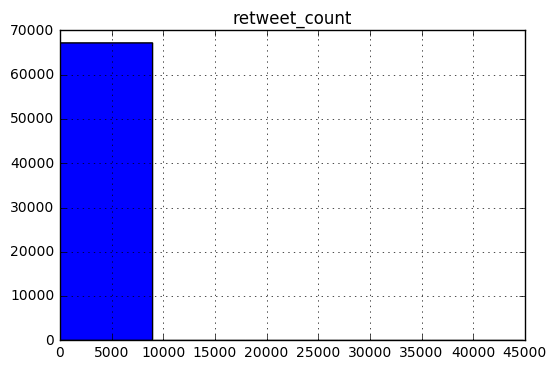

In [14]:
data.hist(column= 'retweet_count', bins=5)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001F76B908>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000002391A828>]], dtype=object)

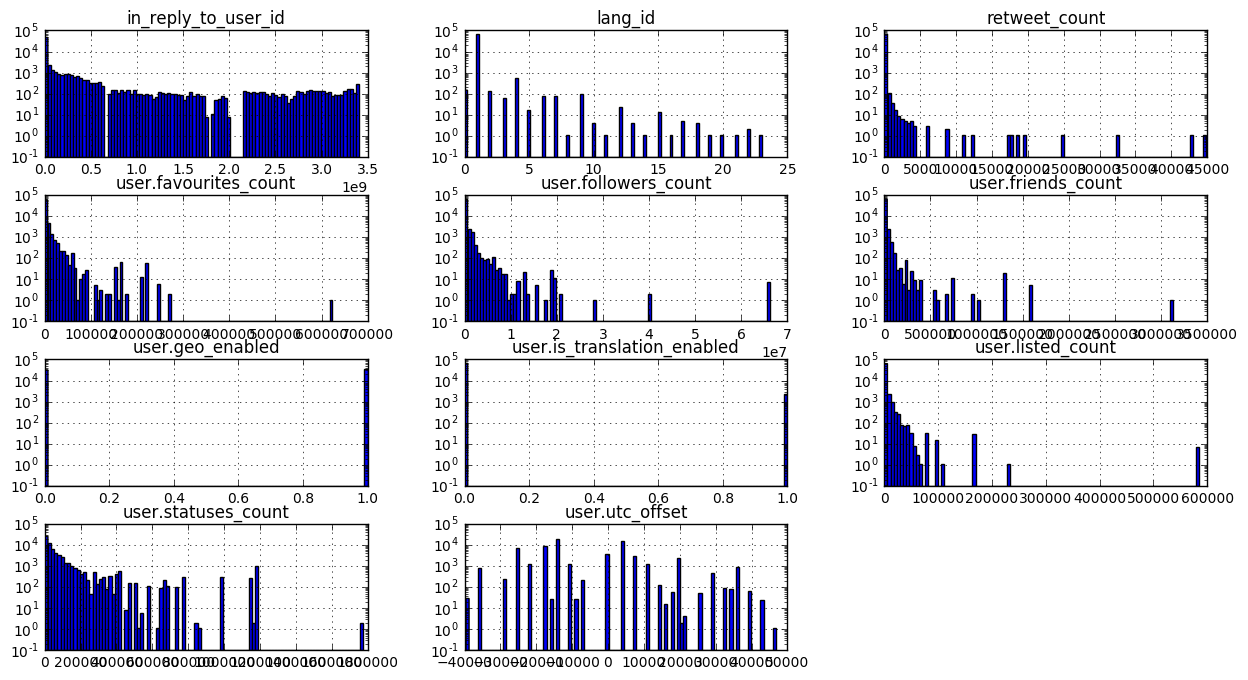

In [54]:
data.hist(bins=100, bottom=0.1, log=True,figsize=(15, 8))

In [62]:
tweets = data[['in_reply_to_user_id', 'lang_id','user.favourites_count','user.followers_count','user.friends_count', 
               'user.geo_enabled', 'user.is_translation_enabled', 'user.listed_count', 'user.statuses_count','user.utc_offset',
              'retweet_count']]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000029FD1780>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000002B52A978>]], dtype=object)

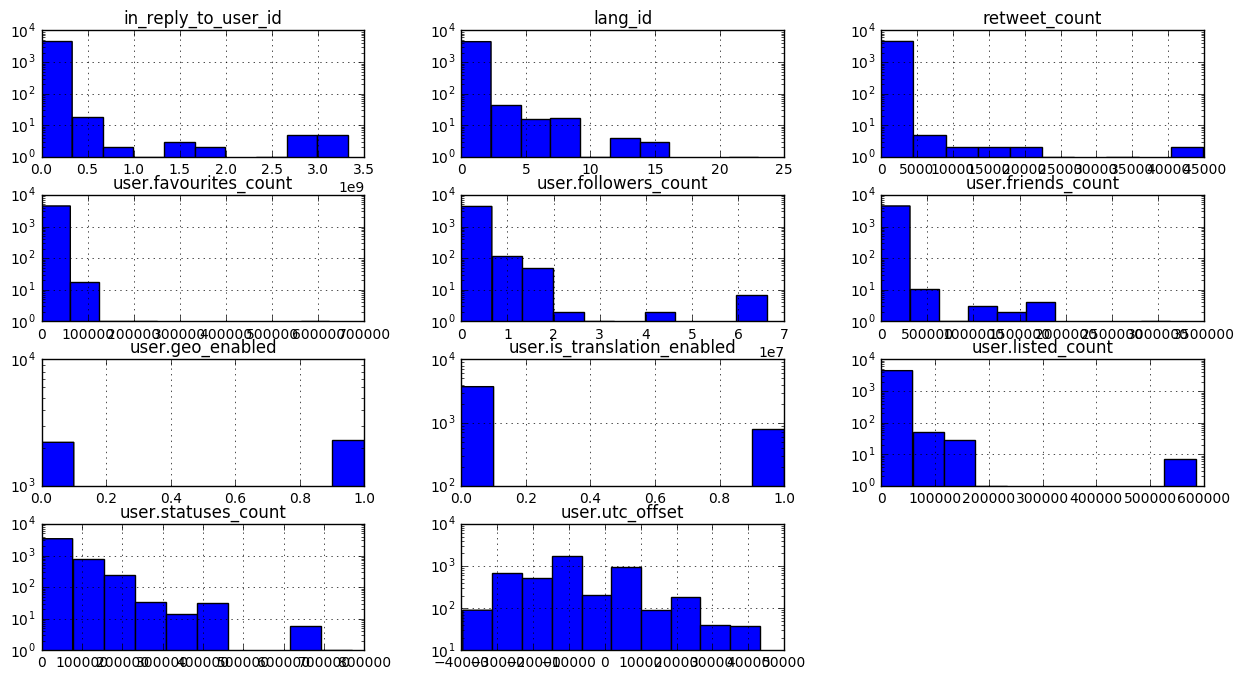

In [61]:
data[data['retweet_count']>=20].hist(figsize=(15,8), log=True)

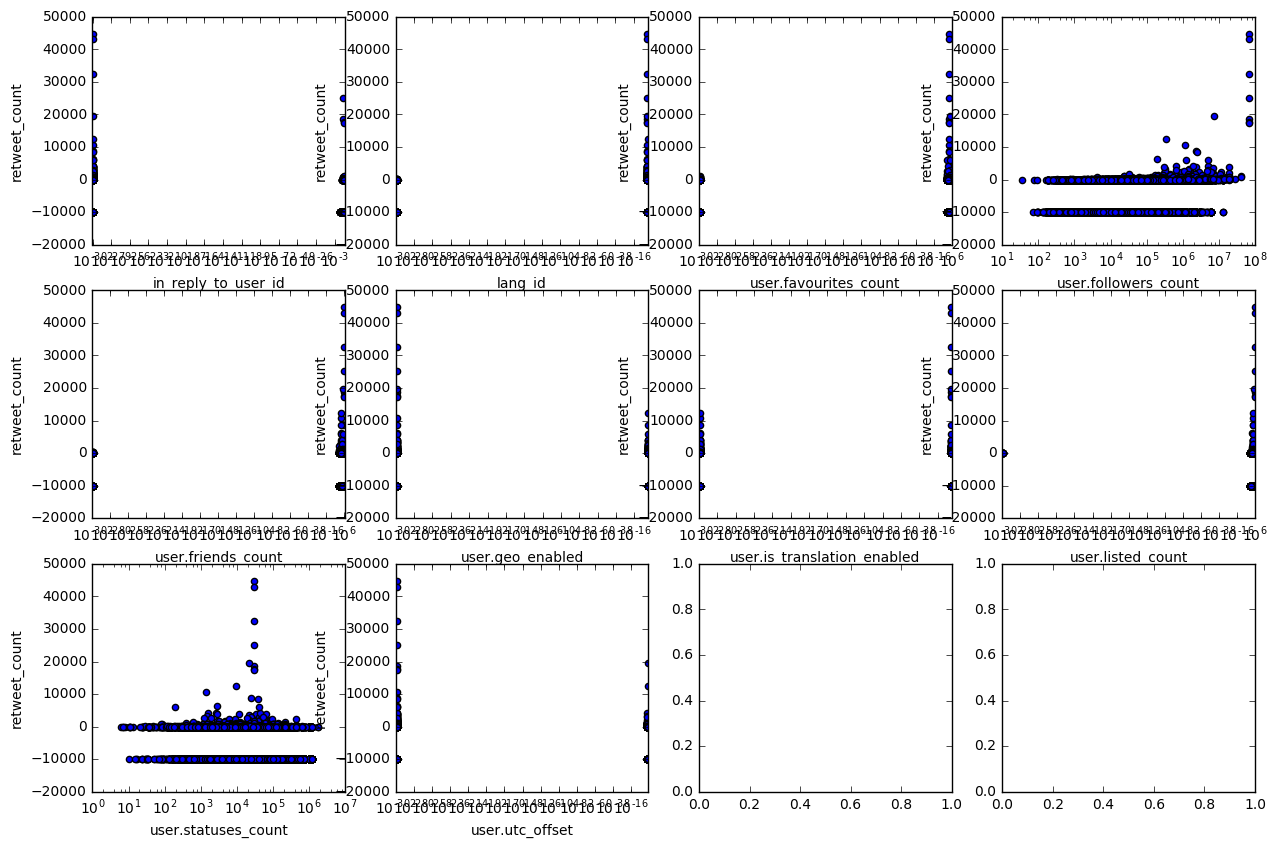

In [118]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
for idx, feature in enumerate(tweets.columns[:-1]):
    tweets.plot(feature, "retweet_count", subplots=True, kind="scatter", ax=axes[idx / 4, idx % 4], logx=True)    

In [116]:
tweets.loc[tweets.retweet_count==-100, 'retweet_count']=-10000

In [110]:
tweets.describe()

,in_reply_to_user_id,lang_id,user.favourites_count,user.followers_count,user.friends_count,user.geo_enabled,user.is_translation_enabled,user.listed_count,user.statuses_count,user.utc_offset,retweet_count
count,6.720000e+04,67200.000000,67200.000000,6.720000e+04,6.720000e+04,67200.000000,67200.000000,67200.000000,6.720000e+04,67200.000000,67200.000000
mean,2.876919e+08,1.064390,3488.631042,2.493938e+05,6.382823e+03,0.527054,0.034777,1829.825536,9.215258e+04,-7586.651786,12.887961
std,7.252412e+08,0.646934,12400.079102,1.101860e+06,3.638433e+04,0.499162,0.183240,8257.888381,1.990634e+05,14008.801768,342.067780
min,0.000000e+00,0.000000,0.000000,3.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,6.000000e+00,-39600.000000,-1.000000
25%,0.000000e+00,1.000000,111.000000,8.763000e+03,4.030000e+02,0.000000,0.000000,138.000000,9.713250e+03,-18000.000000,-1.000000
50%,0.000000e+00,1.000000,722.000000,4.071900e+04,9.295000e+02,1.000000,0.000000,471.000000,2.802500e+04,-14400.000000,-1.000000
75%,1.110530e+08,1.000000,2481.000000,1.462430e+05,2.659000e+03,1.000000,0.000000,1332.000000,7.586700e+04,3600.000000,3.000000
max,3.407433e+09,23.000000,623798.000000,6.622713e+07,3.131983e+06,1.000000,1.000000,584387.000000,1.775275e+06,46800.000000,44834.000000


KeyError: '[  9164.   7484.   2050. ...,   1525.   2340.  69309.] not in index'

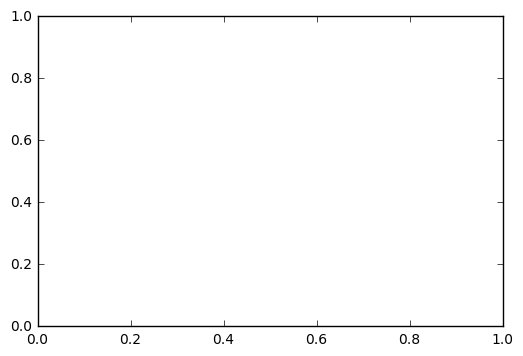

In [120]:
tweets.plot(tweets['user.followers_count'],tweets['retweet_count'], kind='scatter')